In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle
plt.style.use('ggplot')

In [7]:
e_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'Valence', 'Arousal', 'like']
primes = ['none', 'bpm', 'chord', 'lyrics', 'playcount']

In [11]:
with open('./result.csv', 'r') as f:
    results = pd.read_csv(f)
results = results.groupby(['m_id', 'prime']).mean()
results = results.reset_index(level=[0, 1])
# results

In [12]:
results_items = {}
for e_item in e_items:
    result_item = pd.DataFrame()
    for prime in primes:
        tmp = results[results['prime'] == prime]
        tmp_series = pd.Series(tmp[e_item].values, index=tmp['m_id'].values)
        result_item[prime] = tmp_series
    results_items[e_item] = result_item
# results_items['C1']

In [54]:
with open('./moods100.pkl', 'rb') as f:
    moods = pickle.load(f)

### 好感度のプライミング有り・無しの比較


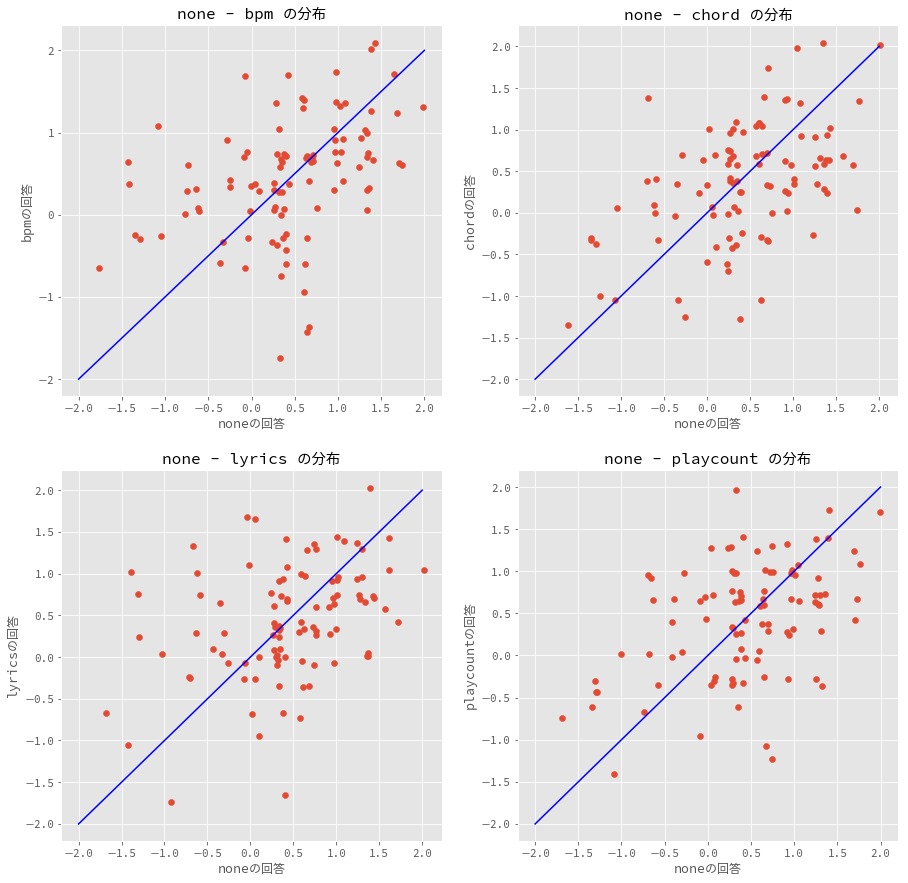

In [52]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)

result_like = results_items['like']
for i, prime in enumerate(primes[1:]):
    x = result_like['none'] + np.random.uniform(-0.1, 0.1, 100)
    y = result_like[prime] + np.random.uniform(-0.1, 0.1, 100)

    px =  int(i / 2)
    py = i % 2
    axes[px, py].scatter(x, y)
    axes[px, py].plot([-2, 2], [-2, 2], c='b')
    axes[px, py].set_title('none - %s の分布' % prime)
    axes[px, py].set_ylabel('%sの回答' % prime)
    axes[px, py].set_xlabel('noneの回答')
plt.show()

## 直線を堺にどんな違いが出るのか？

とりあえずデータセットの評価値で色を付けて、直線で色が分かれてるといい
直線より上の方が色が濃い　＝ その評価値が高いものはプライミング効果で好感度が上がりやすい

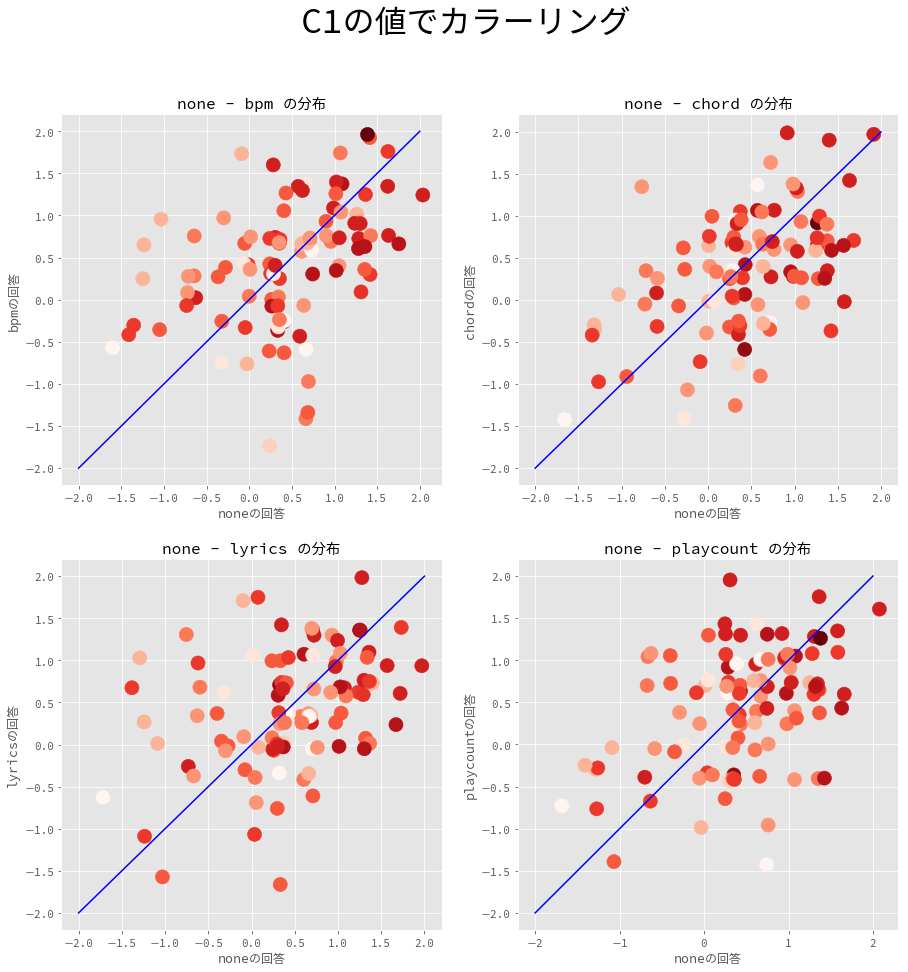

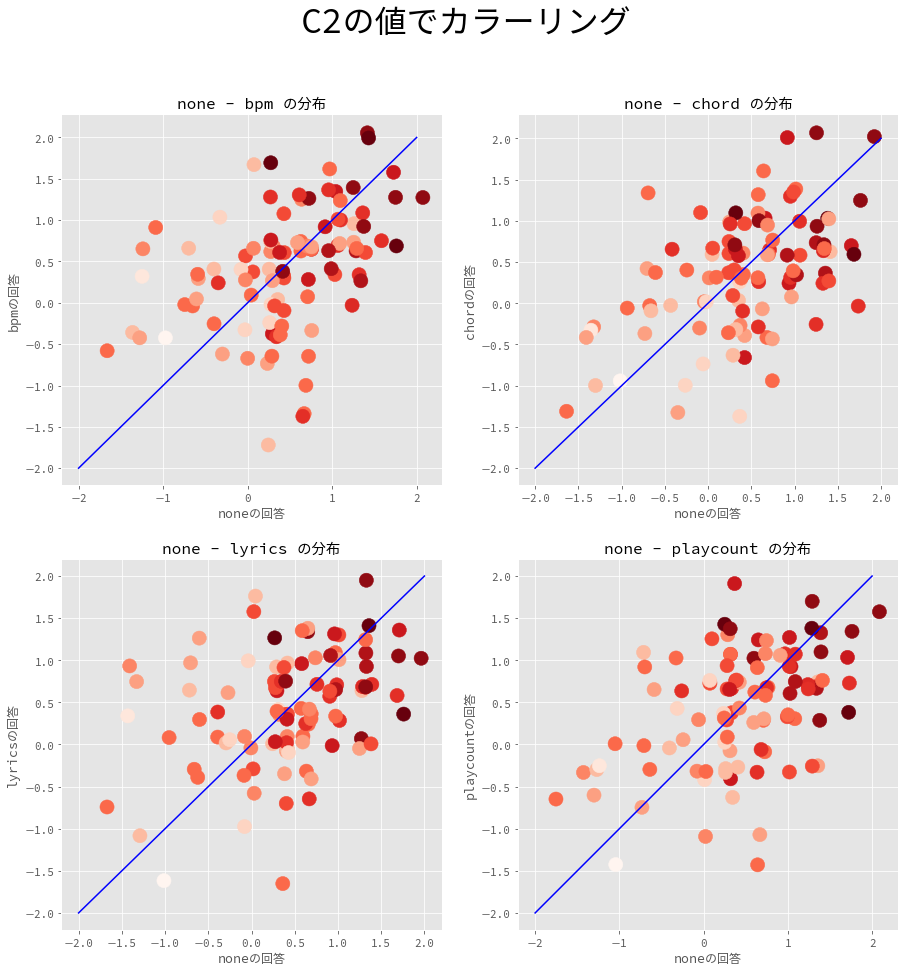

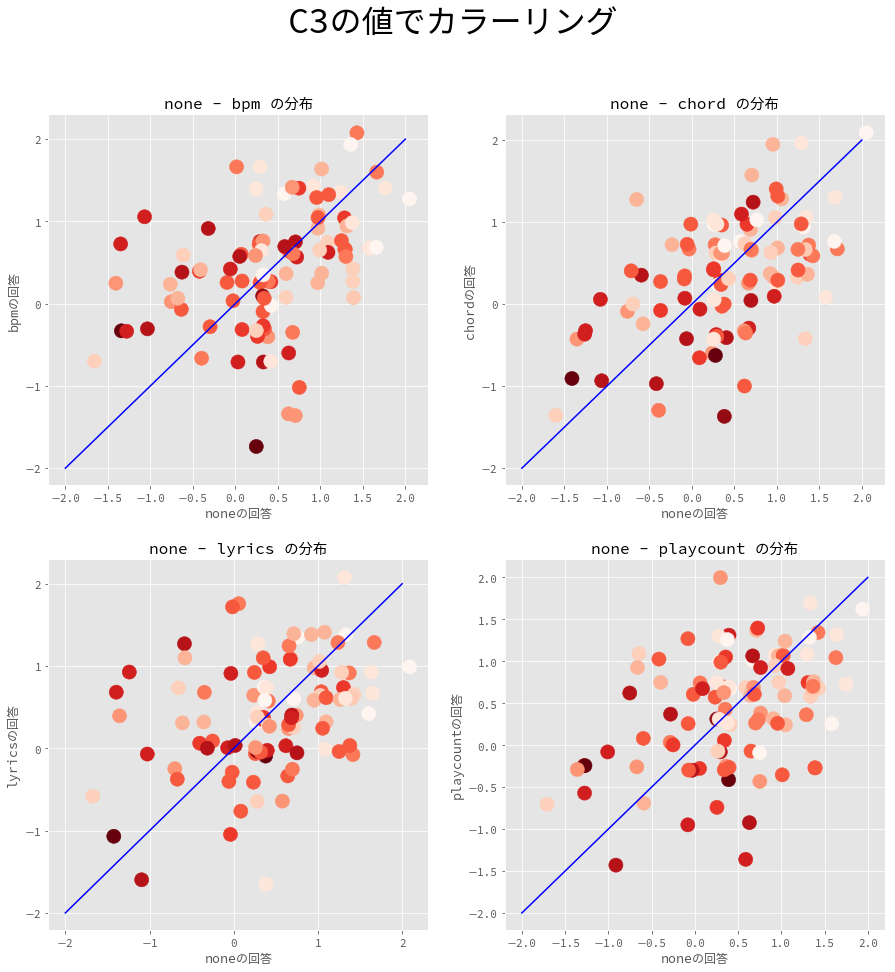

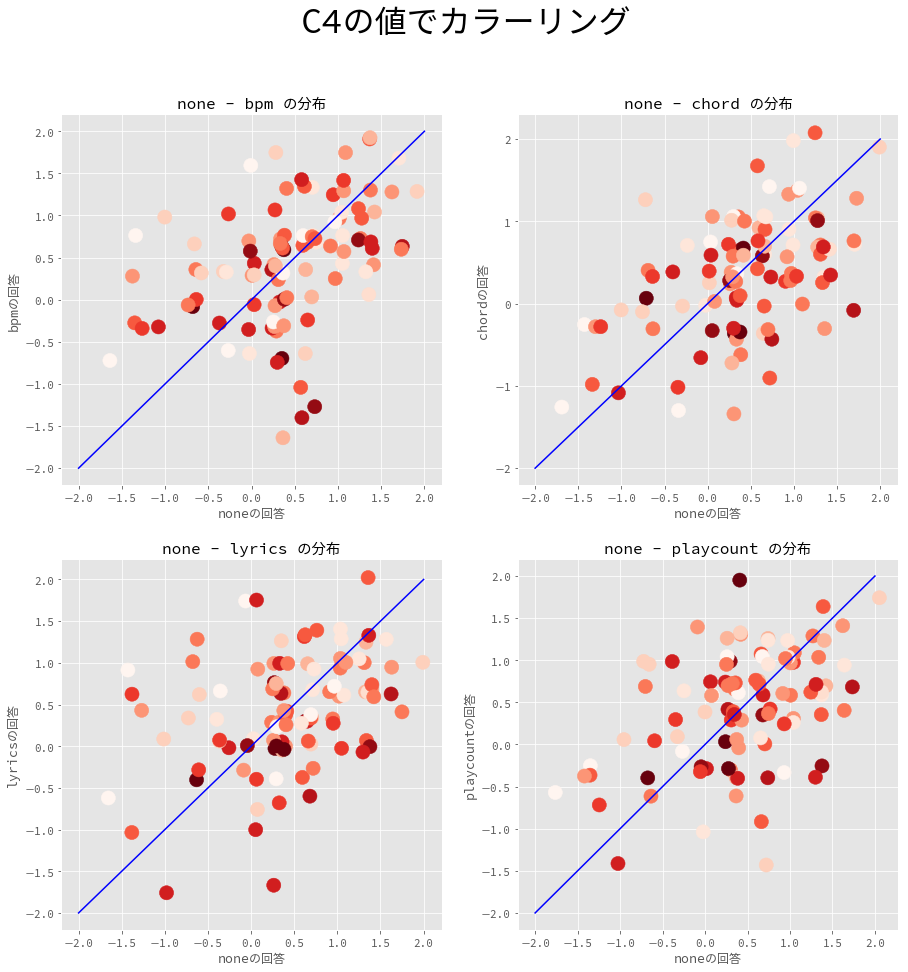

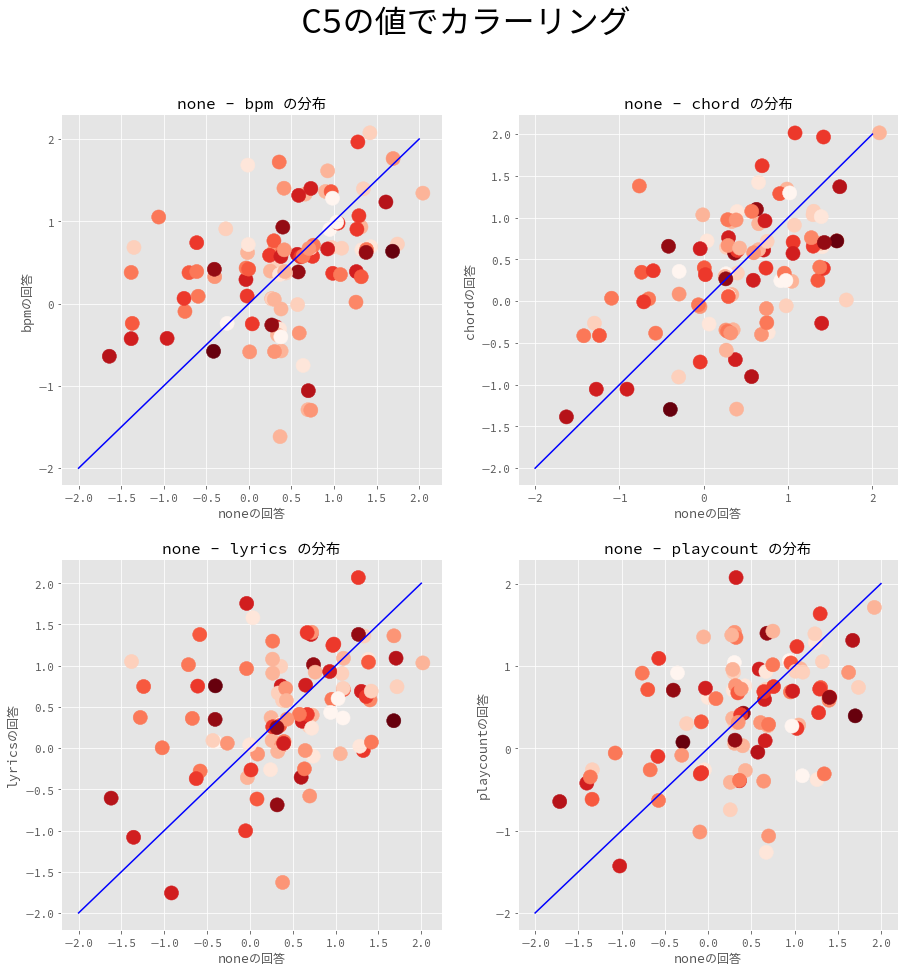

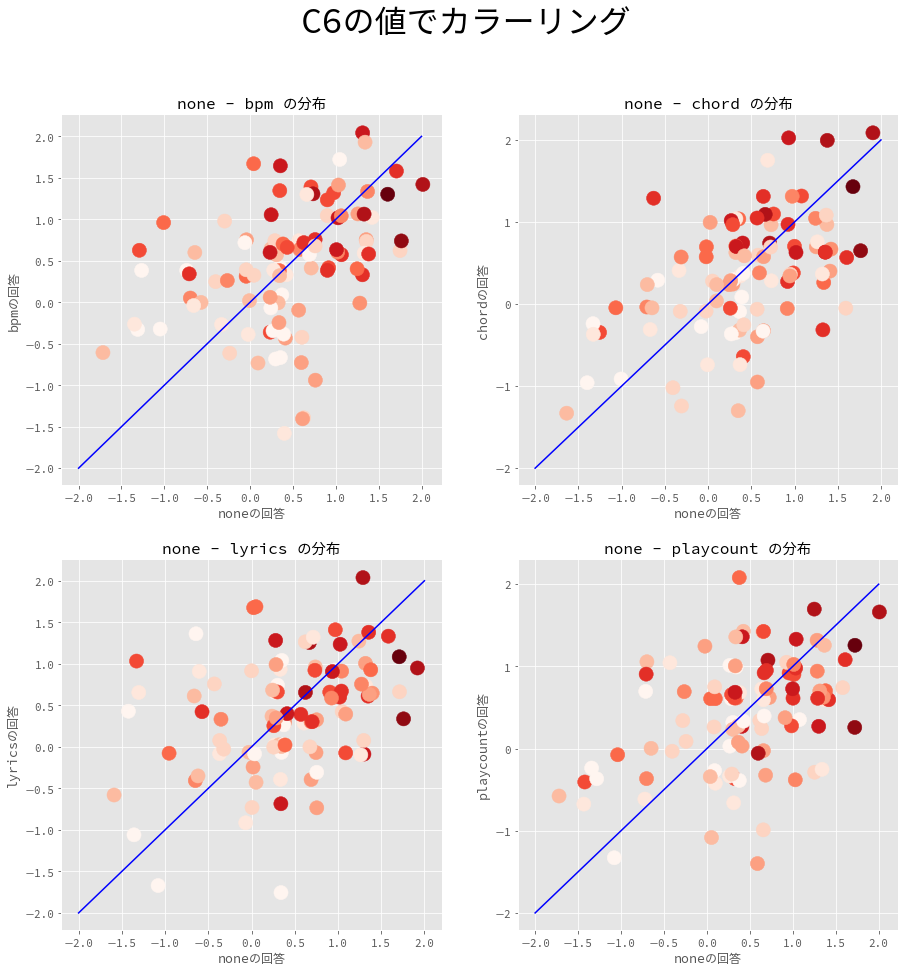

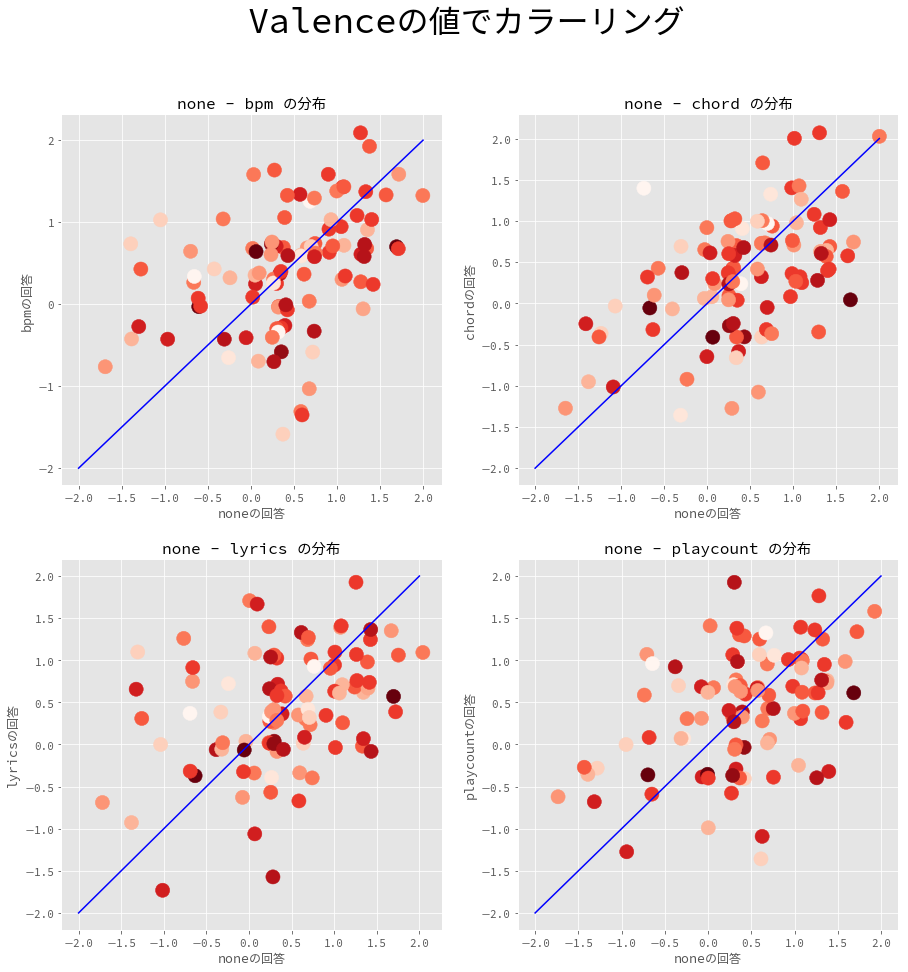

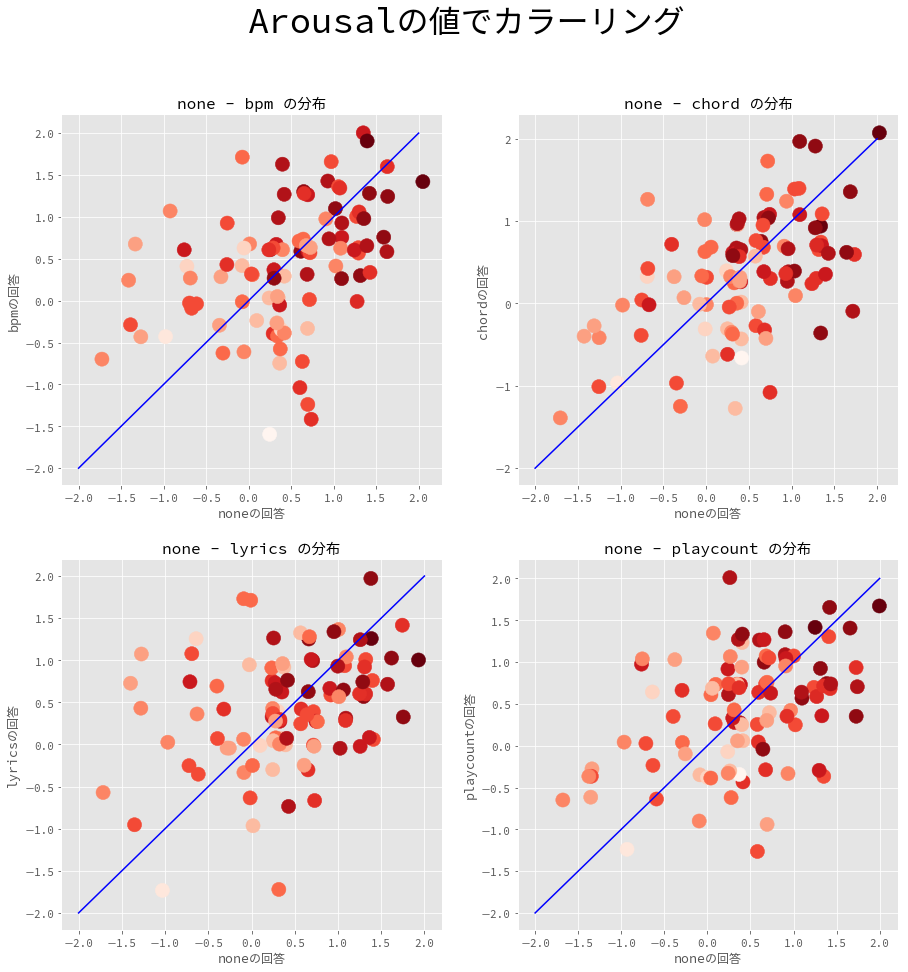

In [84]:
plt.clf()
# fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# plt.subplots_adjust(wspace=0.4, hspace=0.6)

result_like = results_items['like']
for e_item in e_items[:-1]:
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('%sの値でカラーリング' % e_item, fontsize=32)
    for i, prime in enumerate(primes[1:]):
        x = result_like['none'] + np.random.uniform(-0.1, 0.1, 100)
        y = result_like[prime] + np.random.uniform(-0.1, 0.1, 100)
        values = moods[e_item]

        px =  int(i / 2)
        py = i % 2
        axes[px, py].scatter(x, y, s=200, c=values, cmap='Reds')
#         axes[px, py].colorbar()
        axes[px, py].plot([-2, 2], [-2, 2], c='b')
        axes[px, py].set_title('none - %s の分布' % prime)
        axes[px, py].set_ylabel('%sの回答' % prime)
        axes[px, py].set_xlabel('noneの回答')
plt.show()